# EDA on suicide dataset

Suicide is a complex and devastating public health issue impacting individuals and communities worldwide. Understanding the factors associated with suicide risk is crucial for developing effective 


link to dataset-->https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016


In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [299]:
df=pd.read_csv("C:\\Users\\Pratibh\\Downloads\\suicide.csv")

In [300]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [301]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [303]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [304]:
df.shape

(27820, 12)

In [305]:
df[['sex','suicides_no']]

,sex,suicides_no
0,male,21
1,male,16
2,female,14
3,male,1
4,male,9
...,...,...
27815,female,107
27816,female,9
27817,male,60
27818,female,44


In [306]:
# multiindex
mi = df.groupby(['sex','year']).agg({'suicides_no':'mean', 'age':'first'})
mi

suicides_no          age
sex    year                          
female 1985   112.774306  15-24 years
       1986   117.541667  15-24 years
       1987   108.043210  15-24 years
       1988   112.295918    75+ years
       1989   132.567308  35-54 years
...                  ...          ...
male   2012   364.504115  15-24 years
       2013   357.791667  15-24 years
       2014   366.299145  15-24 years
       2015   420.408602  15-24 years
       2016   151.237500    75+ years

[64 rows x 2 columns]

In [307]:
ri=mi.reset_index()
ri

,sex,year,suicides_no,age
0,female,1985,112.774306,15-24 years
1,female,1986,117.541667,15-24 years
2,female,1987,108.043210,15-24 years
3,female,1988,112.295918,75+ years
4,female,1989,132.567308,35-54 years
...,...,...,...,...
59,male,2012,364.504115,15-24 years
60,male,2013,357.791667,15-24 years
61,male,2014,366.299145,15-24 years
62,male,2015,420.408602,15-24 years


In [308]:
# handling missing data
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [309]:
df['HDI for year']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
27815    0.675
27816    0.675
27817    0.675
27818    0.675
27819    0.675
Name: HDI for year, Length: 27820, dtype: float64

In [310]:
df['HDI for year']=df['HDI for year'].fillna(df['HDI for year'].mean())

In [311]:
df['HDI for year']

0        0.776601
1        0.776601
2        0.776601
3        0.776601
4        0.776601
           ...   
27815    0.675000
27816    0.675000
27817    0.675000
27818    0.675000
27819    0.675000
Name: HDI for year, Length: 27820, dtype: float64

In [312]:
df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [313]:
# groupby
gb=df.groupby(['sex','year'])
gb

In [314]:
# agg
agg=gb.agg({'suicides_no':['mean','max'],'age':'first'})
agg

suicides_no                 age
                   mean    max        first
sex    year                                
female 1985  112.774306   2582  15-24 years
       1986  117.541667   2877  15-24 years
       1987  108.043210   2938  15-24 years
       1988  112.295918   2853    75+ years
       1989  132.567308   3042  35-54 years
...                 ...    ...          ...
male   2012  364.504115  11763  15-24 years
       2013  357.791667  11396  15-24 years
       2014  366.299145  11455  15-24 years
       2015  420.408602  11634  15-24 years
       2016  151.237500   1421    75+ years

[64 rows x 3 columns]

In [315]:
# transform
transformed_df = df[['suicides_no', 'population']].transform(lambda x:x*2)
transformed_df

,suicides_no,population
0,42,625800
1,32,616000
2,28,579400
3,2,43600
4,18,548600
...,...,...
27815,214,7241666
27816,18,696930
27817,120,5524316
27818,88,5263200


In [346]:
# stackings
stacked = df.set_index(['sex', 'year'])[['age', 'suicides_no']].stack().reset_index().rename(columns={'level_2': 'level', 0: 'Value'})
stacked

,sex,year,level,Value
0,male,1987,age,15-24 years
1,male,1987,suicides_no,21
2,male,1987,age,35-54 years
3,male,1987,suicides_no,16
4,female,1987,age,15-24 years
...,...,...,...,...
55635,male,2014,suicides_no,60
55636,female,2014,age,5-14 years
55637,female,2014,suicides_no,44
55638,female,2014,age,55-74 years


In [317]:
df.stack()


0      country                      Albania
       year                            1987
       sex                             male
       age                      15-24 years
       suicides_no                       21
                                  ...      
27819  country-year          Uzbekistan2014
       HDI for year                   0.675
        gdp_for_year ($)     63,067,077,179
       gdp_per_capita ($)              2309
       generation                   Boomers
Length: 333840, dtype: object

In [318]:
df.set_index(['generation']).stack()


generation                      
Generation X  country                      Albania
              year                            1987
              sex                             male
              age                      15-24 years
              suicides_no                       21
                                         ...      
Boomers       suicides/100k pop               1.46
              country-year          Uzbekistan2014
              HDI for year                   0.675
               gdp_for_year ($)     63,067,077,179
              gdp_per_capita ($)              2309
Length: 306020, dtype: object

In [319]:
df.set_index(['generation']).stack().reset_index()

,generation,level_1,0
0,Generation X,country,Albania
1,Generation X,year,1987
2,Generation X,sex,male
3,Generation X,age,15-24 years
4,Generation X,suicides_no,21
...,...,...,...
306015,Boomers,suicides/100k pop,1.46
306016,Boomers,country-year,Uzbekistan2014
306017,Boomers,HDI for year,0.675
306018,Boomers,gdp_for_year ($),"63,067,077,179"


In [320]:
# Unstacking
stacked.unstack()


sex    0               male
       1               male
       2               male
       3               male
       4             female
                   ...     
Value  55635             60
       55636     5-14 years
       55637             44
       55638    55-74 years
       55639             21
Length: 222560, dtype: object

In [321]:
# Melting
melted_df = df.melt(id_vars=['country', 'year', 'sex', 'age', 'suicides_no'],  
                    var_name='variable', 
                    value_name='value')
melted_df

,country,year,sex,age,suicides_no,variable,value
0,Albania,1987,male,15-24 years,21,population,312900
1,Albania,1987,male,35-54 years,16,population,308000
2,Albania,1987,female,15-24 years,14,population,289700
3,Albania,1987,male,75+ years,1,population,21800
4,Albania,1987,male,25-34 years,9,population,274300
...,...,...,...,...,...,...,...
194735,Uzbekistan,2014,female,35-54 years,107,generation,Generation X
194736,Uzbekistan,2014,female,75+ years,9,generation,Silent
194737,Uzbekistan,2014,male,5-14 years,60,generation,Generation Z
194738,Uzbekistan,2014,female,5-14 years,44,generation,Generation Z


In [322]:
# pivot
pivoted_df = melted_df.pivot_table(index=['country', 'year', 'sex', 'age', 'suicides_no'], 
                                   columns='variable', 
                                   values='value')
pivoted_df

Empty DataFrame
Columns: []
Index: [(Albania, 1987, female, 15-24 years, 14), (Albania, 1987, female, 25-34 years, 4), (Albania, 1987, female, 35-54 years, 6), (Albania, 1987, female, 5-14 years, 0), (Albania, 1987, female, 55-74 years, 0), (Albania, 1987, female, 75+ years, 1), (Albania, 1987, male, 15-24 years, 21), (Albania, 1987, male, 25-34 years, 9), (Albania, 1987, male, 35-54 years, 16), (Albania, 1987, male, 5-14 years, 0), (Albania, 1987, male, 55-74 years, 1), (Albania, 1987, male, 75+ years, 1), (Albania, 1988, female, 15-24 years, 8), (Albania, 1988, female, 25-34 years, 5), (Albania, 1988, female, 35-54 years, 4), (Albania, 1988, female, 5-14 years, 0), (Albania, 1988, female, 55-74 years, 3), (Albania, 1988, female, 75+ years, 2), (Albania, 1988, male, 15-24 years, 17), (Albania, 1988, male, 25-34 years, 5), (Albania, 1988, male, 35-54 years, 14), (Albania, 1988, male, 5-14 years, 0), (Albania, 1988, male, 55-74 years, 4), (Albania, 1988, male, 75+ years, 1), (Albania, 1989, female, 15-24 years, 5), (Albania, 1989, female, 25-34 years, 2), (Albania, 1989, female, 35-54 years, 7), (Albania, 1989, female, 5-14 years, 0), (Albania, 1989, female, 55-74 years, 1), (Albania, 1989, female, 75+ years, 0), (Albania, 1989, male, 15-24 years, 12), (Albania, 1989, male, 25-34 years, 18), (Albania, 1989, male, 35-54 years, 15), (Albania, 1989, male, 5-14 years, 0), (Albania, 1989, male, 55-74 years, 6), (Albania, 1989, male, 75+ years, 2), (Albania, 1992, female, 15-24 years, 7), (Albania, 1992, female, 25-34 years, 4), (Albania, 1992, female, 35-54 years, 2), (Albania, 1992, female, 5-14 years, 0), (Albania, 1992, female, 55-74 years, 1), (Albania, 1992, female, 75+ years, 0), (Albania, 1992, male, 15-24 years, 9), (Albania, 1992, male, 25-34 years, 7), (Albania, 1992, male, 35-54 years, 12), (Albania, 1992, male, 5-14 years, 0), (Albania, 1992, male, 55-74 years, 5), (Albania, 1992, male, 75+ years, 0), (Albania, 1993, female, 15-24 years, 10), (Albania, 1993, female, 25-34 years, 7), (Albania, 1993, female, 35-54 years, 7), (Albania, 1993, female, 5-14 years, 1), (Albania, 1993, female, 55-74 years, 2), (Albania, 1993, female, 75+ years, 0), (Albania, 1993, male, 15-24 years, 18), (Albania, 1993, male, 25-34 years, 9), (Albania, 1993, male, 35-54 years, 10), (Albania, 1993, male, 5-14 years, 1), (Albania, 1993, male, 55-74 years, 7), (Albania, 1993, male, 75+ years, 1), (Albania, 1994, female, 15-24 years, 6), (Albania, 1994, female, 25-34 years, 4), (Albania, 1994, female, 35-54 years, 2), (Albania, 1994, female, 5-14 years, 0), (Albania, 1994, female, 55-74 years, 1), (Albania, 1994, female, 75+ years, 2), (Albania, 1994, male, 15-24 years, 6), (Albania, 1994, male, 25-34 years, 6), (Albania, 1994, male, 35-54 years, 9), (Albania, 1994, male, 5-14 years, 1), (Albania, 1994, male, 55-74 years, 11), (Albania, 1994, male, 75+ years, 2), (Albania, 1995, female, 15-24 years, 13), (Albania, 1995, female, 25-34 years, 7), (Albania, 1995, female, 35-54 years, 8), (Albania, 1995, female, 5-14 years, 2), (Albania, 1995, female, 55-74 years, 2), (Albania, 1995, female, 75+ years, 2), (Albania, 1995, male, 15-24 years, 11), (Albania, 1995, male, 25-34 years, 13), (Albania, 1995, male, 35-54 years, 14), (Albania, 1995, male, 5-14 years, 6), (Albania, 1995, male, 55-74 years, 9), (Albania, 1995, male, 75+ years, 1), (Albania, 1996, female, 15-24 years, 16), (Albania, 1996, female, 25-34 years, 10), (Albania, 1996, female, 35-54 years, 9), (Albania, 1996, female, 5-14 years, 1), (Albania, 1996, female, 55-74 years, 1), (Albania, 1996, female, 75+ years, 2), (Albania, 1996, male, 15-24 years, 17), (Albania, 1996, male, 25-34 years, 14), (Albania, 1996, male, 35-54 years, 12), (Albania, 1996, male, 5-14 years, 2), (Albania, 1996, male, 55-74 years, 3), (Albania, 1996, male, 75+ years, 2), (Albania, 1997, female, 15-24 years, 21), (Albania, 1997, female, 25-34 years, 16), (Albania, 1997, female, 35-54 years, 7), (Albania, 1997, female, 5

# Visualization

In [323]:
df_10 = df.groupby('country')['suicides_no'].sum().nlargest(10).reset_index(name='total_suicides')
df_10

,country,total_suicides
0,Russian Federation,1209742
1,United States,1034013
2,Japan,806902
3,France,329127
4,Ukraine,319950
5,Germany,291262
6,Republic of Korea,261730
7,Brazil,226613
8,Poland,139098
9,United Kingdom,136805


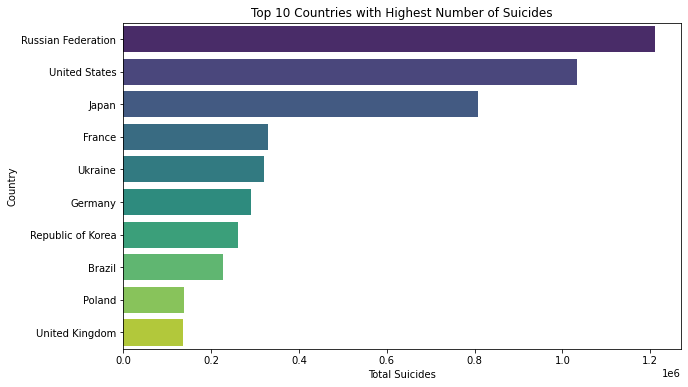

In [324]:
# barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='total_suicides', y='country', data=df_10, palette='viridis')
plt.xlabel('Total Suicides')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Number of Suicides')
plt.show()

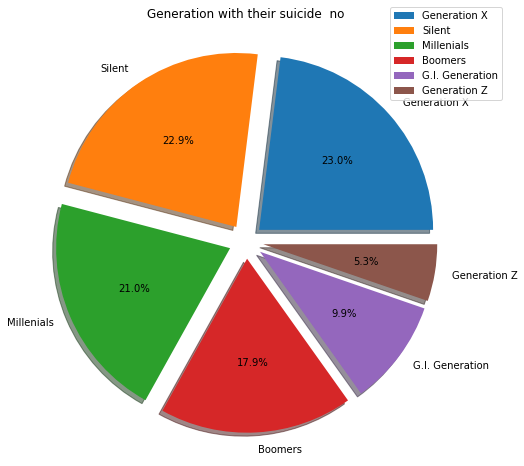

In [325]:
# pie chart
explode = [0.1, 0.1,0.1,0.1,0.1,0.1]
plt.figure(figsize=(8, 8))
df['generation'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=explode,shadow=True)
plt.title('Generation with their suicide  no')
plt.ylabel('') 
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05))
plt.show()

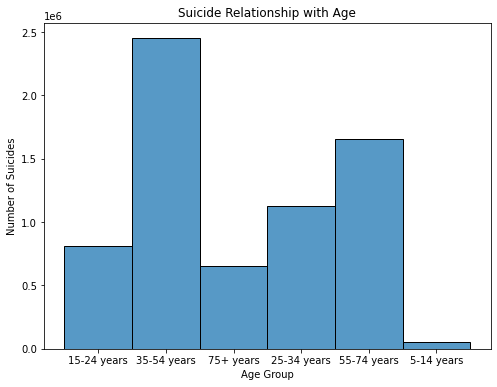

In [326]:
# hist plot
plt.figure(figsize=(8, 6))
plt.title("Suicide Relationship with Age")
sns.histplot(x='age', data=df, weights='suicides_no', bins=6)
plt.xlabel('Age Group')
plt.ylabel('Number of Suicides')
plt.show()

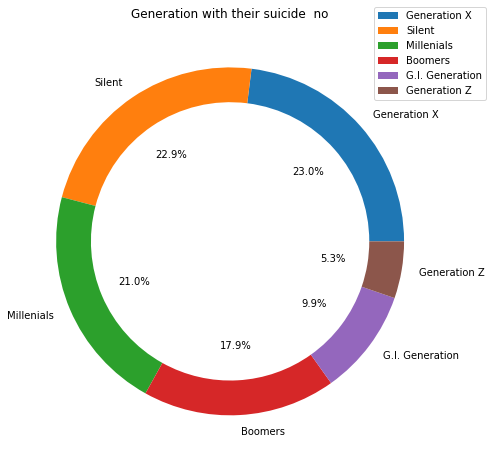

In [327]:
# doghnut
plt.figure(figsize=(8, 8))
df['generation'].value_counts().plot(kind='pie',autopct='%1.1f%%',wedgeprops={'width': 0.2})
plt.title('Generation with their suicide  no')
plt.ylabel('') 
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05))
plt.show()

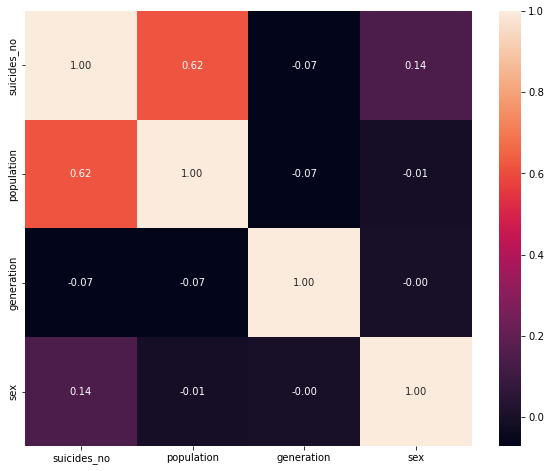

In [328]:
# Heat map
# Convert categorical variables 'generation' and 'sex' into numerical values
df_encoded = df.copy()
df_encoded['generation'] = pd.Categorical(df_encoded['generation']).codes
df_encoded['sex'] = pd.Categorical(df_encoded['sex']).codes

columns = ['suicides_no', 'population', 'generation', 'sex']

df_c = df_encoded[columns]

correlation_matrix = df_c.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()


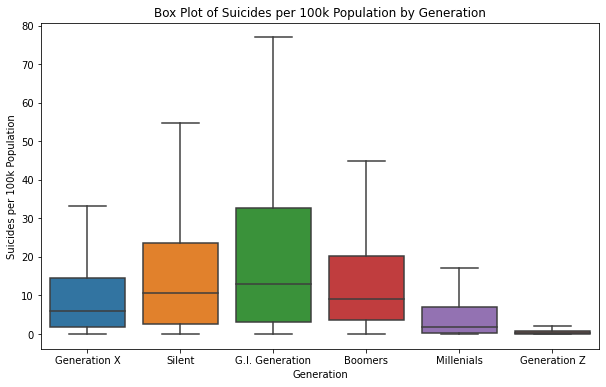

In [329]:
# box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='generation', y='suicides/100k pop', data=df,showfliers=False)
plt.title('Box Plot of Suicides per 100k Population by Generation')
plt.xlabel('Generation')
plt.ylabel('Suicides per 100k Population')
plt.show()

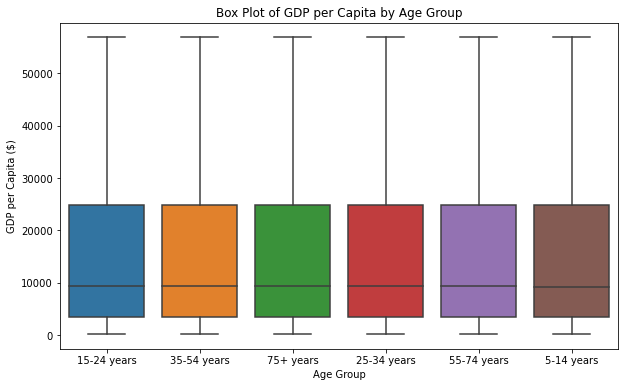

In [330]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='gdp_per_capita ($)', data=df,showfliers=False)
plt.title('Box Plot of GDP per Capita by Age Group')
plt.xlabel('Age Group')
plt.ylabel('GDP per Capita ($)')
plt.show()

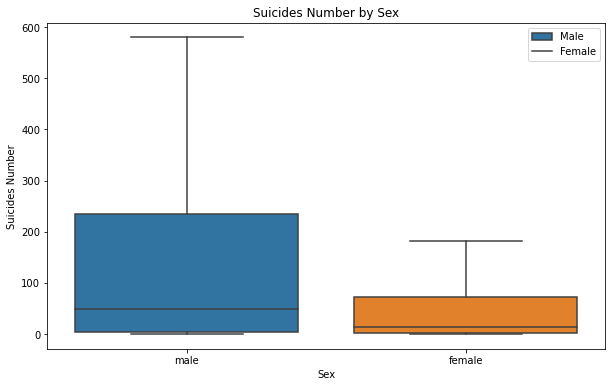

In [331]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='suicides_no', data=df, showfliers=False)
plt.title('Suicides Number by Sex')
plt.xlabel('Sex')
plt.ylabel('Suicides Number')
plt.legend(labels=['Male', 'Female'])
plt.show()

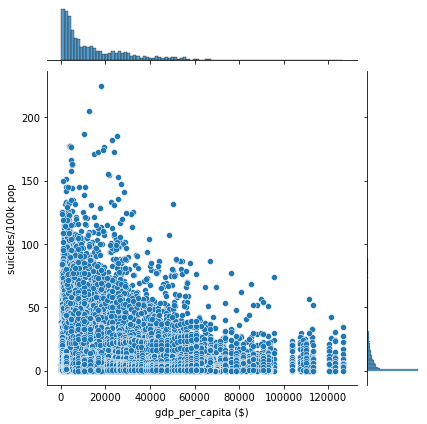

In [332]:
# joint plot
sns.jointplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=df, kind='scatter')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicides per 100k Population')
plt.show()

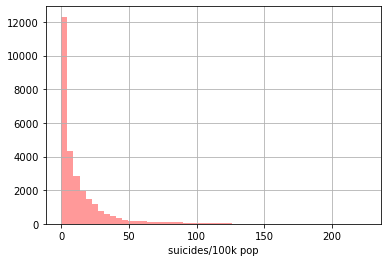

In [333]:
# distplot
sns.distplot(df['suicides/100k pop'],kde=False, color ='red')
plt.grid()

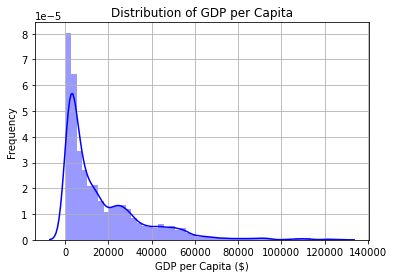

In [334]:
sns.distplot(df['gdp_per_capita ($)'], kde=True, color='blue')
plt.title('Distribution of GDP per Capita')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


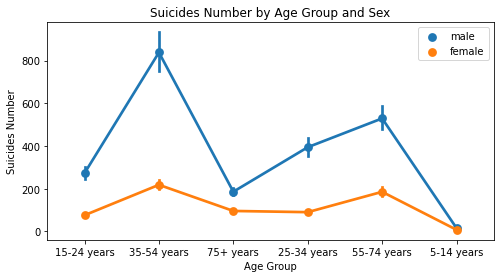

In [335]:
# pointplot
plt.figure(figsize=(8, 4))
sns.pointplot(x='age', y='suicides_no', data=df, hue='sex')
plt.title('Suicides Number by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Suicides Number')
plt.legend()
plt.show()

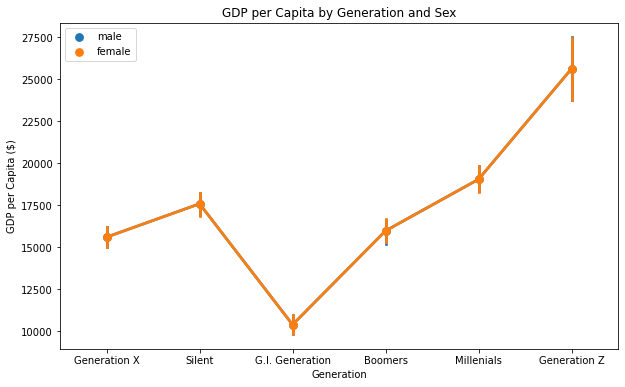

In [336]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='generation', y='gdp_per_capita ($)', data=df, hue='sex')
plt.title('GDP per Capita by Generation and Sex')
plt.xlabel('Generation')
plt.ylabel('GDP per Capita ($)')
plt.legend()
plt.show()

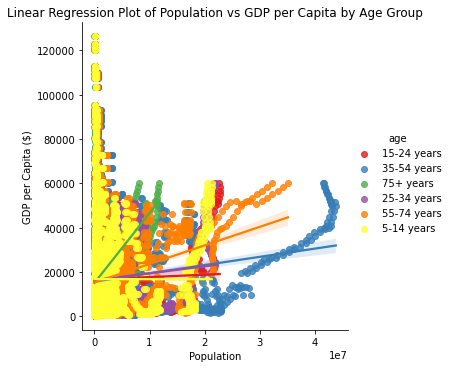

In [337]:
sns.lmplot(x='population', y='gdp_per_capita ($)', hue='age', data=df, palette='Set1')
plt.xlabel('Population')
plt.ylabel('GDP per Capita ($)')
plt.title('Linear Regression Plot of Population vs GDP per Capita by Age Group')
plt.show()

The above tell us following things
*The main trend line represents the average relationship between population and GDP per capita across all age groups. It shows whether there's a general tendency for GDP per capita to increase or decrease with population size.
*The different colors represent distinct age groups. By observing how the data points cluster around their respective trend lines, we can discern whether the relationship between population and GDP per capita varies significantly among different age groups.

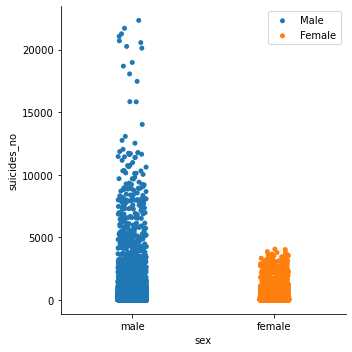

In [338]:
# cat plot
sns.catplot(data=df,x='sex',y='suicides_no')
plt.legend(['Male','Female'])


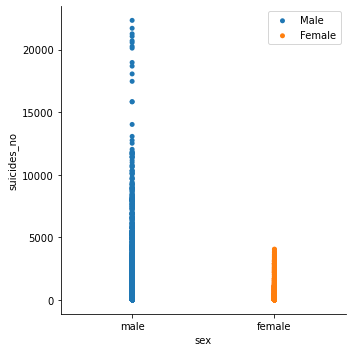

In [339]:
sns.catplot(data=df,x='sex',y='suicides_no',jitter=False)
plt.legend(['Male','Female'])

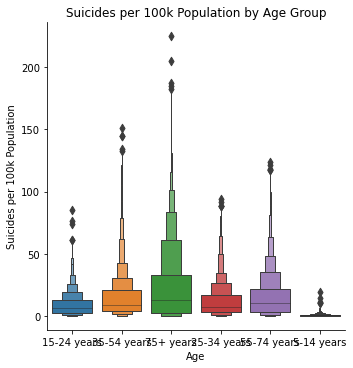

In [340]:
sns.catplot(x='age', y='suicides/100k pop', data=df, kind='boxen',linewidth=1)
plt.xlabel('Age')
plt.ylabel('Suicides per 100k Population')
plt.title('Suicides per 100k Population by Age Group')
plt.show()


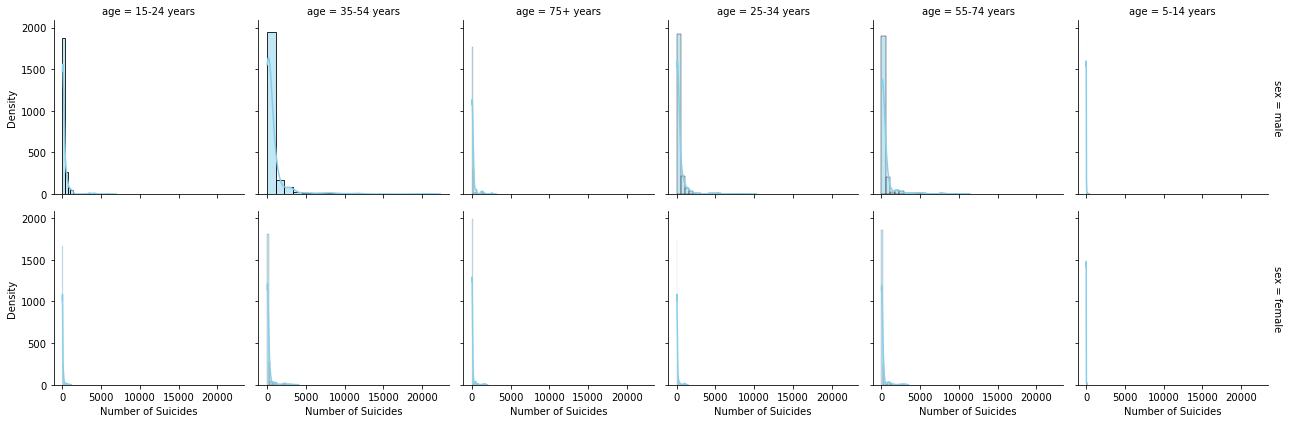

In [341]:
# Facetgrid
g = sns.FacetGrid(df, col="age", row="sex", margin_titles=True, height=3)
g.map(sns.histplot, "suicides_no", kde=True, bins=20, color="skyblue")
g.set_axis_labels("Number of Suicides", "Density")
plt.show()


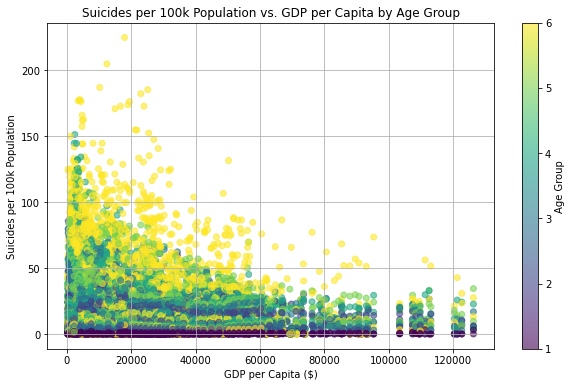

In [342]:
# scatter plot
age_mapping = {'5-14 years': 1, '15-24 years': 2, '25-34 years': 3, '35-54 years': 4, '55-74 years': 5, '75+ years': 6}
df['age_numeric'] = df['age'].map(age_mapping)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['gdp_per_capita ($)'], df['suicides/100k pop'], c=df['age_numeric'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Age Group')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicides per 100k Population')
plt.title('Suicides per 100k Population vs. GDP per Capita by Age Group')
plt.grid()
plt.show()

<Figure size 864x576 with 0 Axes>

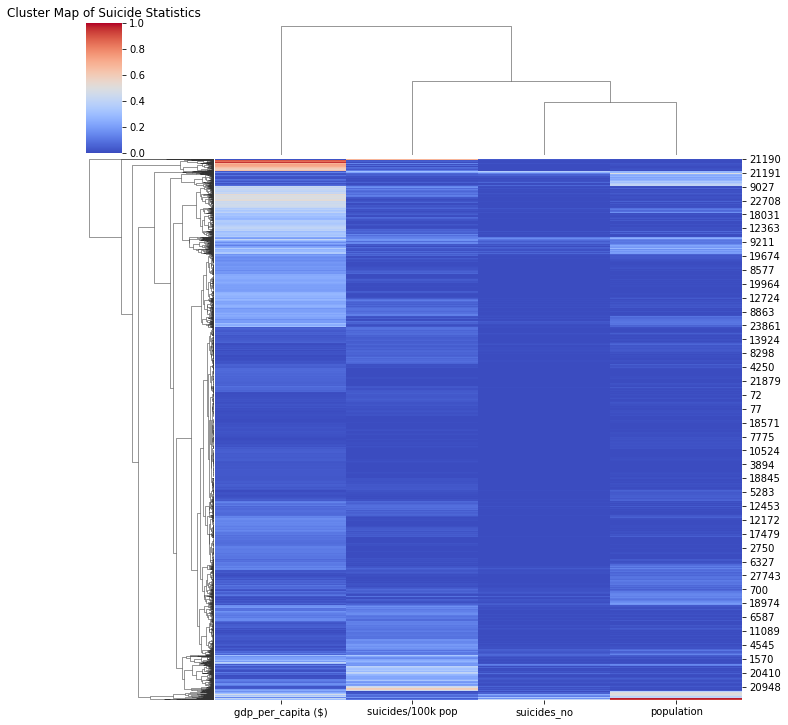

In [343]:
# clustermap
columns_to_cluster = ['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']
subset_df = df[columns_to_cluster]
plt.figure(figsize=(12, 8))
sns.clustermap(subset_df, cmap='coolwarm', standard_scale=1)  # Standardize the data
plt.title('Cluster Map of Suicide Statistics')
plt.show()

# Plotly

In [344]:
fig = px.scatter(df, x="gdp_per_capita ($)", y="suicides_no", color="country",
                 labels={"gdp_per_capita ($)": "GDP per Capita ($)", "suicides_no": "Number of Suicides"},
                 title="Suicides vs. GDP per Capita by Country")
fig.update_traces(marker=dict(size=8))
fig.update_layout(
    xaxis_title="GDP per Capita ($)",
    yaxis_title="Number of Suicides",
    showlegend=False
)
fig.show()



In [345]:
fig = px.box(df, x="age", y="suicides_no", color="sex",
             labels={"age": "Age Group", "suicides_no": "Number of Suicides", "sex": "Sex"},
             title="Suicides by Age Group and Sex")
fig.update_layout(
    xaxis_title="Age Group",
    yaxis_title="Number of Suicides"
)
fig.show()
